In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [3]:
file_path = ("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")
df = pd.read_csv(file_path)
df


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


The df.isnull().sum() method provides a count of missing values (NaN) for each column in the DataFrame df. It helps you identify which columns have missing values and how many such values are present.

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

100%

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
stats = df.price.describe()
stats

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [8]:
Q1 = stats['25%']
Q3 = stats['75%']

#  (IQR)
IQR = Q3 - Q1
IQR

8715.0

Q1: The first quartile (25th percentile) of the price data.
Q3: The third quartile (75th percentile) of the price data.
IQR: The Interquartile Range, calculated as Q3 - Q1.
1.5 * IQR: A common multiplier used to define the range for outliers. Values falling outside this range are considered outliers.

In [9]:
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print("Outliers:")
print(outliers)

Outliers:
     car_ID  symboling                          CarName fueltype aspiration  \
15       16          0                           bmw x4      gas        std   
16       17          0                           bmw x5      gas        std   
17       18          0                           bmw x3      gas        std   
47       48          0                        jaguar xj      gas        std   
48       49          0                        jaguar xf      gas        std   
49       50          0                        jaguar xk      gas        std   
70       71         -1                    buick skyhawk   diesel      turbo   
71       72         -1          buick opel isuzu deluxe      gas        std   
72       73          3                    buick skylark      gas        std   
73       74          0            buick century special      gas        std   
74       75          1  buick regal sport coupe (turbo)      gas        std   
126     127          3                porc

df['price'] >= lower_bound: This condition checks if the price value in each row is greater than or equal to lower_bound.
df['price'] <= upper_bound: This condition checks if the price value in each row is less than or equal to upper_bound.
&: The & operator is used to combine these two conditions. Both conditions must be true for a row to be included in the resulting DataFrame.

In [10]:
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_clean


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Data Manipulation: Knowing column names helps in selecting, modifying, or dropping columns as needed for analysis or model training.


In [11]:
print(df_clean.columns)


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


Unique Values: The unique() method returns an array of unique values in the specified column.

In [12]:
print(df_clean['fueltype'].unique())


['gas' 'diesel']


Data Conversion: The conversion ensures that the fueltype_gas_True column contains integer values (0 or 1) instead of boolean values (True or False)

In [13]:
print(df_clean.columns)


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [14]:
print("Unique values in 'fueltype':", df_clean['fueltype'].unique())


Unique values in 'fueltype': ['gas' 'diesel']


In [15]:
df_dummies = pd.get_dummies(df_clean['fueltype'], prefix='fueltype')
df_dummies 

,fueltype_diesel,fueltype_gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
200,False,True
201,False,True
202,False,True
203,True,False


In [16]:
# Concatenate dummy variables with the original DataFrame
df_clean = pd.concat([df_clean, df_dummies], axis=1)
df_clean

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,False,True
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,False,True
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,False,True
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,False,True
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,False,True
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,False,True
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,False,True
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,True,False


In [17]:
df_clean = df_clean.drop(columns=['fueltype'])
df_clean

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas
0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,False,True
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,False,True
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,False,True
3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,False,True
4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845.0,False,True
201,202,-1,volvo 144ea,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,False,True
202,203,-1,volvo 244dl,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485.0,False,True
203,204,-1,volvo 246,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470.0,True,False


In [18]:
print("Columns after encoding:", df_clean.columns)


Columns after encoding: Index(['car_ID', 'symboling', 'CarName', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_diesel',
       'fueltype_gas'],
      dtype='object')


In [19]:
print(df_clean.head())


   car_ID  symboling                   CarName aspiration doornumber  \
0       1          3        alfa-romero giulia        std        two   
1       2          3       alfa-romero stelvio        std        two   
2       3          1  alfa-romero Quadrifoglio        std        two   
3       4          2               audi 100 ls        std       four   
4       5          2                audi 100ls        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \
0       3.47    2.68               9.0        111    5000  

In [20]:
df_clean[['fueltype_diesel', 'fueltype_gas']] = df_clean[['fueltype_diesel', 'fueltype_gas']].astype(int)


In [21]:
print(df_clean.head())
print("Columns after conversion:", df_clean.columns)


   car_ID  symboling                   CarName aspiration doornumber  \
0       1          3        alfa-romero giulia        std        two   
1       2          3       alfa-romero stelvio        std        two   
2       3          1  alfa-romero Quadrifoglio        std        two   
3       4          2               audi 100 ls        std       four   
4       5          2                audi 100ls        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \
0       3.47    2.68               9.0        111    5000  

Pairplot: The pairplot function creates scatter plots for each pair of features in the DataFrame, along with histograms or density plots for each feature along the diagonal. This allows you to visually inspect relationships and distributions.

Hue: By using hue, the scatter plots will use different colors for different values of the fueltype_gas_True column, making it easier to see how the fuel type affects the relationships between features.

In [22]:
print(df_clean[['price', 'enginesize', 'horsepower', 'fueltype_diesel', 'fueltype_gas']].head())


     price  enginesize  horsepower  fueltype_diesel  fueltype_gas
0  13495.0         130         111                0             1
1  16500.0         130         111                0             1
2  16500.0         152         154                0             1
3  13950.0         109         102                0             1
4  17450.0         136         115                0             1


In [23]:
print(df_clean[['price', 'enginesize', 'horsepower', 'fueltype_diesel', 'fueltype_gas']].info())


<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 204
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            190 non-null    float64
 1   enginesize       190 non-null    int64  
 2   horsepower       190 non-null    int64  
 3   fueltype_diesel  190 non-null    int64  
 4   fueltype_gas     190 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 8.9 KB
None


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

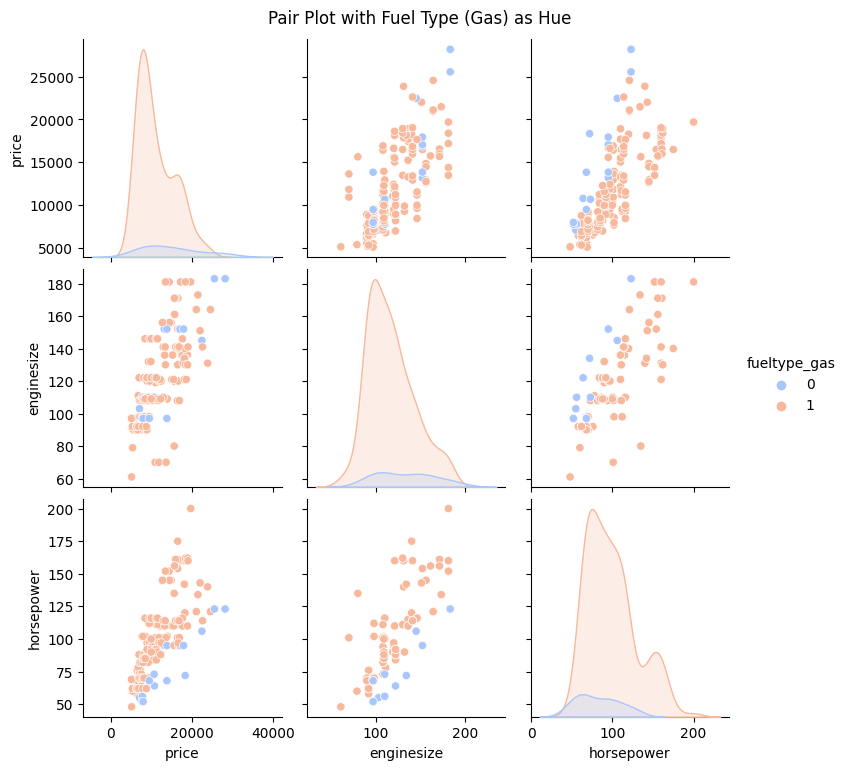

In [24]:

sns.pairplot(df_clean[['price', 'enginesize', 'horsepower', 'fueltype_gas']],
             hue='fueltype_gas', dropna=True, palette='coolwarm')

plt.suptitle('Pair Plot with Fuel Type (Gas) as Hue', y=1.02)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

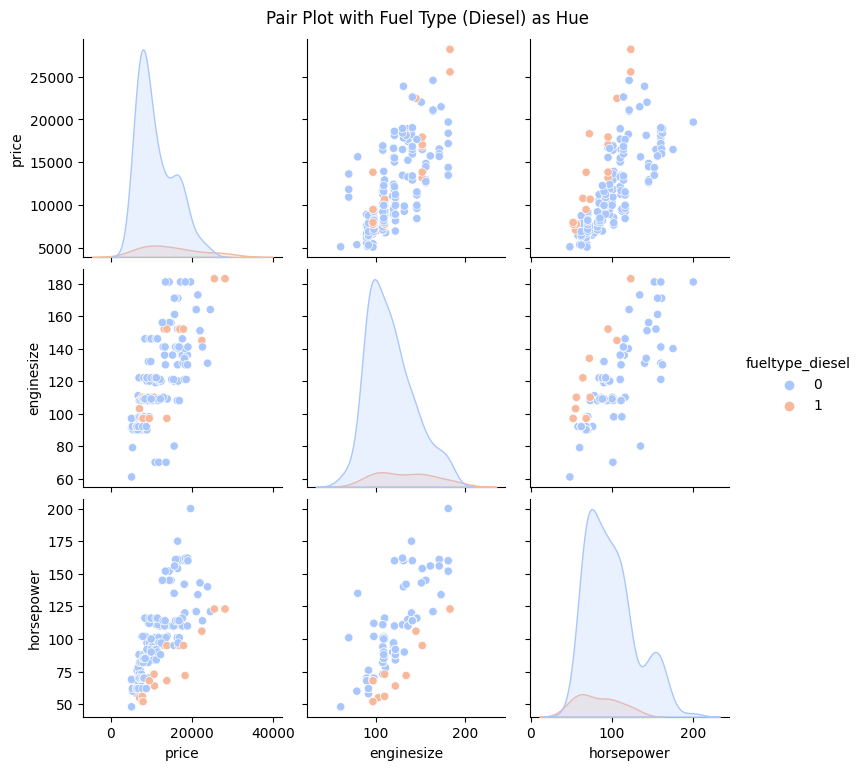

In [25]:
sns.pairplot(df_clean[['price', 'enginesize', 'horsepower', 'fueltype_diesel']],
             hue='fueltype_diesel', dropna=True, palette='coolwarm')

plt.suptitle('Pair Plot with Fuel Type (Diesel) as Hue', y=1.02)
plt.show()

In [26]:
# Check for missing values in the relevant columns
print(df_clean[['price', 'enginesize', 'horsepower', 'fueltype_diesel', 'fueltype_gas']].isnull().sum())


price              0
enginesize         0
horsepower         0
fueltype_diesel    0
fueltype_gas       0
dtype: int64


In [27]:
print(df_clean.groupby(['fueltype_diesel', 'fueltype_gas']).size())


fueltype_diesel  fueltype_gas
0                1               171
1                0                19
dtype: int64


In [28]:
from sklearn.model_selection import train_test_split

# Prepare features and target variable
X = df_clean[['enginesize', 'horsepower', 'fueltype_diesel', 'fueltype_gas']]
y = df_clean['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 4242914.382979728
R^2 Score: 0.7475888391462538
Mean Absolute Error: 1637.5532377183777
Root Mean Squared Error: 2059.8335813797503


*Explanation:
Mean Squared Error (MSE) is a measure of how spread out the errors are between the predicted values and the actual values. It is calculated as the average of the squared differences between the actual values and the predicted values.

A high MSE value indicates that the errors in predictions could be large. In this context, the number 4242914.38 means that the average squared difference between the actual values and the predictions is of this magnitude.
Interpretation:

A lower MSE indicates that the model predicts more accurately. However, the MSE value itself is not very useful unless compared to other values or models.
R² Score (Coefficient of Determination)

Value: 0.7476
Explanation:

R² Score is a measure of how well the model's predictions match the actual data. It is calculated by comparing the variance in the actual values with the variance explained by the model.

R² Score ranges from 0 to 1, where 1 means the model explains 100% of the variance in the data, and 0 means the model explains none of the variance.

A value of 0.7476 means that the model explains approximately 74.76% of the variance in the price data, indicating that the model can predict prices with relative accuracy.

Interpretation:

A high R² score (like 0.7476) is a good indicator that the model predicts with relatively high accuracy. However, there is always room for improvement, especially if additional data or new features could help enhance performance.

In [30]:
df_clean.head(5)

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas
0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1
3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1
4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1


In [31]:

# Define the input data with proper syntax
input_data = pd.DataFrame({
    'enginesize': [130],       # Replace with the value you want to predict
    'horsepower': [111],       # Given value
    'fueltype_diesel': [1],    # Dummy variable for diesel
    'fueltype_gas': [0]        # Dummy variable for gas
})

# Predict the price
predicted_price = model.predict(input_data)
predicted_price

array([17915.69477462])

The predicted price is approximately $17,915.69